<a href="https://colab.research.google.com/github/spacemaninSeoul/fast_campus_ML300/blob/main/Chapter_5_%E1%84%82%E1%85%B2%E1%84%89%E1%85%B3%E1%84%8B%E1%85%A6%E1%84%89%E1%85%A5%E1%84%86%E1%85%A1%E1%86%AB_%E1%84%87%E1%85%A9%E1%84%83%E1%85%A5%E1%86%AB_%E1%84%8F%E1%85%A9%E1%84%85%E1%85%A9%E1%84%82%E1%85%A119_%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5%2C_%E1%84%8C%E1%85%B5%E1%86%A8%E1%84%8C%E1%85%A5%E1%86%B8_%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8%E1%84%92%E1%85%A1%E1%84%80%E1%85%A9_%E1%84%8C%E1%85%B5%E1%86%A8%E1%84%8C%E1%85%A5%E1%86%B8_%E1%84%91%E1%85%A1%E1%86%AB%E1%84%83%E1%85%A1%E1%86%AB%E1%84%92%E1%85%A2%E1%84%87%E1%85%A9%E1%86%B8%E1%84%89%E1%85%B5%E1%84%83%E1%85%A1(%EB%AC%B8%EC%A0%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 뉴스에서만 보던 코로나-19 데이터, 직접 분석하고 직접 판단해봅시다.
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 John Hopkins 대학의 COVID-19 데이터셋을 사용합니다.
    
    - 총 10개의 파일 중 2개의 Raw 데이터를 사용합니다.
    RAW_global_confirmed_cases.csv
    RAW_global_global_deaths.csv

    - 각 파일의 컬럼은 아래와 같습니다.
    Country/Region: 국가
    Province/State: 지방/주
    Lat: 지역의 위도
    Long: 지역의 경도
    날짜: 각 날짜의 확진자/사망자 수
    
    
    
- 데이터 출처: https://www.kaggle.com/antgoldbloom/covid19-data-from-john-hopkins-university

## 최종 목표
    - 계속해서 업데이트되는 라이브 데이터 분석하기
    - Pandas를 이용해 원하는 표 형태로 변경
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Plotly를 이용하여 Interactive plot하기
    - FBProphet을 이용해 시계열 데이터를 처리하는 방법 습득
    - 학습된 모델로 부터의 인사이트 획득 방법 습득

- 출제자 : 신제용 강사
---

## Step 0. 시계열 데이터에 관하여

### 코로나19 데이터셋에 관하여

### 시계열 데이터와 일반 테이블 데이터와 다른 점

시계열 데이터의 경우 보통 인덱스가 시간. 시간 별로 특정 값의 변화를 표현. 인덱스의 순서가 중요.


### FBProphet 라이브러리 설명

페이스북에서 만든 라이브러리.


## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ ['KAGGLE_USERNAME'] = 'pseudoexaminee'
os.environ ['KAGGLE_KEY'] = '50ef5cd85c486772c23beb302ab99e32'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d antgoldbloom/covid19-data-from-john-hopkins-university
!unzip '*.zip'

  0% 0.00/6.59M [00:00<?, ?B/s]
100% 6.59M/6.59M [00:00<00:00, 108MB/s]
Archive:  covid19-data-from-john-hopkins-university.zip
  inflating: CONVENIENT_global_confirmed_cases.csv  
  inflating: CONVENIENT_global_deaths.csv  
  inflating: CONVENIENT_global_metadata.csv  
  inflating: CONVENIENT_us_confirmed_cases.csv  
  inflating: CONVENIENT_us_deaths.csv  
  inflating: CONVENIENT_us_metadata.csv  
  inflating: RAW_global_confirmed_cases.csv  
  inflating: RAW_global_deaths.csv   
  inflating: RAW_us_confirmed_cases.csv  
  inflating: RAW_us_deaths.csv       


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [5]:
df_case = pd.read_csv('/content/RAW_global_confirmed_cases.csv')
df_death = pd.read_csv('/content/RAW_global_deaths.csv')

## Step 2. 데이터 구조 변경 및 시각화하기


### 문제 4. 데이터프레임 구조를 Date를 Index로, 지역을 Column으로 변경


In [6]:
df_case.head()

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,155191,155191,155287,155309,155380,155429,155448,155466,155508,155540,155599,155627,155682,155688,155739,155764,155776,155801,155859,155891,155931,155940,155944,156040,156071,156124,156166,156196,156210,156250,156284,156307,156323,156363,156392,156397,156397,156397,156397,156414
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,171327,171794,171794,172618,173190,173723,174168,174643,174968,175163,175664,176172,176667,177108,177536,177971,178188,178804,179463,180029,180623,181252,181696,181960,182610,183282,183873,184340,184887,185300,185497,186222,186793,187363,187994,187994,189125,189355,190125,190815
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,203657,203789,203915,204046,204171,204276,204388,204490,204597,204695,204790,204900,205005,205106,205199,205286,205364,205453,205529,205599,205683,205750,205822,205903,205990,206069,206160,206270,206358,206452,206566,206649,206754,206878,206995,207079,207156,207254,207385,207509
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15222,15222,15267,15271,15284,15288,15291,15291,15291,15307,15307,15314,15326,15338,15338,15338,15367,15369,15382,15382,15404,15404,15404,15425,15425,15462,15505,15516,15516,15516,15516,15516,15572,15618,15618,15618,15618,15705,15717,15744
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,58603,58943,58943,59895,60448,60803,61023,61245,61378,61580,61794,62143,62385,62606,62789,62842,63012,63197,63340,63567,63691,63775,63861,63930,64033,64126,64226,64301,64374,64433,64458,64487,64533,64583,64612,64654,64674,64724,64762,64815


In [7]:
df_death.head()

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7206,7206,7212,7214,7220,7221,7221,7221,7225,7228,7230,7234,7238,7238,7238,7243,7246,7247,7247,7249,7252,7253,7255,7260,7262,7266,7268,7269,7272,7280,7281,7281,7284,7284,7284,7284,7284,7288,7290,7291
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2710,2713,2713,2725,2734,2746,2753,2759,2768,2777,2783,2788,2797,2807,2810,2820,2829,2841,2849,2855,2863,2870,2874,2880,2888,2893,2902,2909,2916,2924,2931,2937,2940,2944,2948,2948,2955,2966,2970,2975
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5819,5822,5826,5831,5838,5843,5846,5850,5853,5855,5859,5862,5864,5867,5870,5872,5873,5875,5878,5881,5883,5886,5890,5894,5899,5904,5907,5913,5918,5920,5924,5927,5931,5936,5939,5941,5945,5950,5954,5960
3,Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130
4,Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1574,1577,1577,1587,1598,1603,1613,1618,1622,1629,1642,1650,1653,1660,1662,1664,1670,1678,1682,1685,1693,1695,1697,1701,1702,1703,1705,1707,1708,1710,1713,1713,1716,1718,1719,1719,1720,1721,1723,1723


In [8]:
df_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Columns: 663 entries, Country/Region to 11/10/21
dtypes: float64(2), int64(659), object(2)
memory usage: 1.4+ MB


In [9]:
import datetime

In [10]:
df_case['Country/Region'].value_counts()

China               34
Canada              16
France              12
United Kingdom      12
Australia            8
                    ..
Chad                 1
Eswatini             1
Congo (Kinshasa)     1
Iraq                 1
Suriname             1
Name: Country/Region, Length: 196, dtype: int64

In [11]:
def fix_dataframe(df):
  # TODO: 불필요한 컬럼 제거, Date를 datetime 객체로 변환, Date를 index로 변경
  df = df.drop(['Lat', 'Long'], axis=1).groupby('Country/Region').sum()
  df = df.transpose()
  df.index.name = 'Date'
  df.reset_index(inplace=True)
  df['Date'] = df['Date'].apply(lambda s: pd.to_datetime(str(s)))
  df.set_index('Date', inplace=True)
  return df

In [12]:
df_case = fix_dataframe(df_case)
df_death = fix_dataframe(df_death)

In [13]:
df_case

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-06,156397,187994,207079,15618,64654,4091,5296188,319016,180314,875333,544650,22485,277041,1570835,19831,612015,1414463,27894,24804,2623,517229,257401,192935,21874324,13742,631506,15103,505998,20136,38253,119021,104348,1737252,11579,5107,1706622,110178,5012981,4307,17944,...,6398,215780,513297,353660,20,22693,2923751,12453,5025639,544630,40433,865,49504,1177094,887446,44191,16438,17486,26196,1960039,19799,26114,1,58975,713254,8206345,46465823,126492,3200411,740362,9317072,395099,187666,6,412472,961038,455099,9858,209869,133168
2021-11-07,156397,189125,207156,15618,64674,4091,5296781,320433,181578,883887,547281,22485,277081,1571013,20069,613927,1414463,27894,24804,2623,517902,257401,192935,21880439,13742,632762,15103,506816,20136,38256,119092,104348,1738543,11579,5107,1709189,110268,5015042,4315,17944,...,6398,218333,518635,355979,20,22693,2923956,12453,5025639,545256,40433,865,49550,1177094,887446,44191,16442,17486,26196,1967999,19799,26114,1,59304,713308,8233649,46487791,126570,3218967,740432,9346961,395268,187924,6,413135,968684,455099,9870,209902,133187
2021-11-08,156397,189355,207254,15705,64724,4091,5298069,321243,182870,892065,548591,22529,277098,1571228,20265,615814,1438830,28162,24804,2623,518266,259913,193449,21886077,13782,638048,15103,507815,20162,38263,119160,104348,1743338,11579,5107,1711442,110330,5016959,4321,18153,...,6398,220803,521650,357262,20,22693,2924072,12514,5032056,545935,40433,865,49602,1177094,894093,45096,16445,17486,26196,1975591,19799,26122,1,59658,713352,8261473,46613282,126625,3233178,740500,9379286,395410,188169,6,414220,976672,455689,9883,209908,133205


### 문제 5. 나라별 확진자 수 및 사망자 수 시각화하기


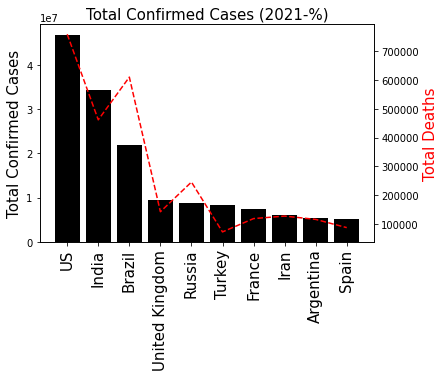

In [14]:
# 아래와 같이 나라별 누적 사망자 수와 확진자 수를 시각화하여 비교하기 (최신일자, 가장 많이 확진된 10국가)
top_ten_cases = df_case.loc[df_case.index[-1]].sort_values(ascending=False)[:10]
sns.barplot(x=top_ten_cases.index, y=top_ten_cases, color='black')
plt.xticks(rotation=90, size=15)
plt.ylabel('Total Confirmed Cases', size=15)
plt.xlabel('')
plt.title('Total Confirmed Cases (%s)' % top_ten_cases.name.strftime('%Y-%'), size=15)

ax = plt.gca()
ax2 = ax.twinx()
top_ten_deaths = df_death.loc[df_death.index[-1]][top_ten_cases.index]
plt.plot(top_ten_deaths.index, top_ten_deaths, 'r--')
ax2.set_ylabel('Total Deaths', color='red', size=15)
plt.show()

In [15]:
# 이 셀의 결과가 지워지지 않도록 주의하세요.

### 문제 6. 특정 국가의 확진자 수 및 사망자 수 변화 시각화하기

In [35]:
# 나라별 시간에 따른 확진자 수 및 사망자 수 시각화하기
def plot_case_with_death(country):
  # TODO: 입력받은 국가의 누적 확진자/사망자 수 시각화
  # case의 경우와 순서를 맞추기 위해 탑텐케이스 인덱스 기준으로 정렬

  plt.plot(df_case.index, df_case[country], 'b-')
  plt.ylabel('Confired Cases', color='blue')
  plt.title(country + ' Cases & Deaths')
  plt.xlim(right=df_case.index[-1])
  plt.ylim(0, df_case[country].max()*1.1)
  plt.xlabel('Date')
  plt.xticks(rotation=90)

  ax = plt.gca()
  ax2 = ax.twinx()
  ax2.plot(df_death.index, df_death[country], 'r--')
  ax2.set_ylabel('Deaths', color='red')
  ax2.set_ylim(0, df_death[country].max()*1.3)
  plt.show()

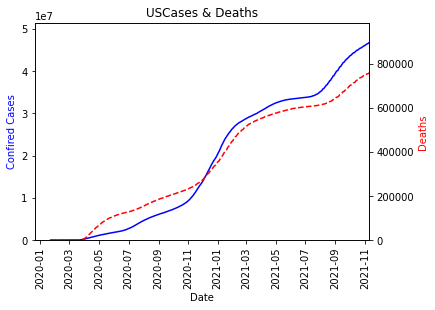

In [25]:
# case의 경우와 순서를 맞추기 위해 탑텐케이스 인덱스 기준으로 정렬

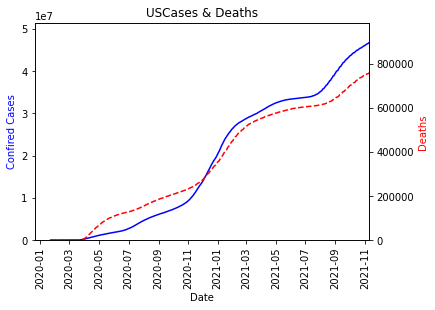

In [33]:
# 아래와 같은 결과가 나오도록 하시오. 결과가 지워지지 않도록 주의하세요.
plot_case_with_death('US')

### 문제 7. 한국의 확진자 수 및 사망자 수 변화 시각화/분석하기

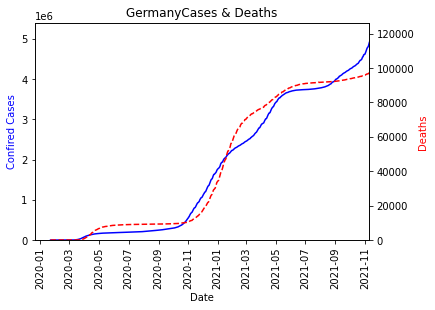

In [34]:
plot_case_with_death('Germany')

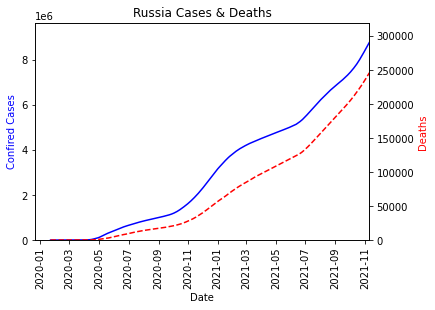

In [36]:
plot_case_with_death('Russia')

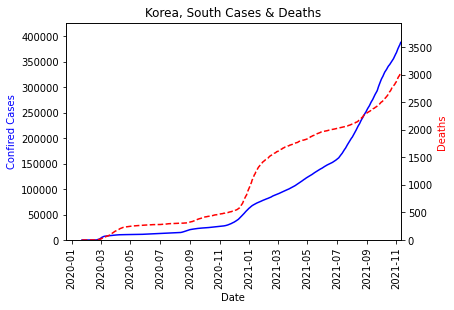

In [37]:
# 한국의 누적 확진자 수/사망자 수를 시각화하고 분석하시오.
plot_case_with_death('Korea, South')

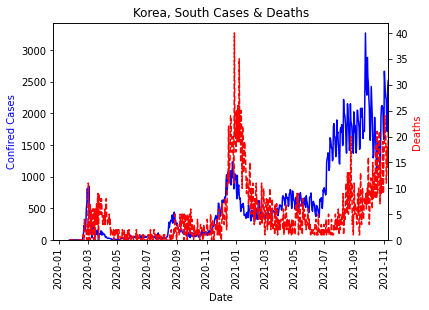

In [41]:
# 한국의 일일 확진자 수/사망자 수를 시각화하고 분석하시오.
country = 'Korea, South'
plt.plot(df_case.index, df_case[country].diff(), 'b-')
plt.ylabel('Confired Cases', color='blue')
plt.title(country + ' Cases & Deaths')
plt.xlim(right=df_case.index[-1])
plt.ylim(bottom=0)
plt.xlabel('Date')
plt.xticks(rotation=90)

ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(df_death.index, df_death[country].diff(), 'r--')
ax2.set_ylabel('Deaths', color='red')
ax2.set_ylim(bottom=0)
plt.show()

## Step 3. Plotly를 이용하여 데이터 시각화하기

### 문제 8. Plotly의 Choropleth 데이터 포맷으로 맞추기

In [42]:
import plotly.graph_objects as go

In [43]:
# 아래 데이터프레임를 이용하여 국가명을 국가코드로 변경
df_code = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

# Hint) 이름이 다르게 쓰인 국가의 이름을 먼저 변경한 후에 코드로 변경
country_renamer = {
    'Bahamas':'Bahamas, The',
    'Congo (Brazzaville)':'Congo, Republic of the',
    'Congo (Kinshasa)':'Congo, Democratic Republic of the',
    'Czechia':'Czech Republic',
    'Eswatini':'Swaziland',
    'Gambia':'Gambia, The',
    'North Macedonia':'Macedonia',
    'Taiwan*':'Taiwan',
    'US':'United States',
    'West Bank and Gaza':'West Bank'
}

In [44]:
df_code.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [45]:
df_case.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0


In [49]:
country_to_code = df_code.set_index('COUNTRY')['CODE']

In [50]:
df_c = df_case.rename(country_renamer, axis=1).copy()
for col in df_c.columns:
  if col not in country_to_code.index:
    df_c.drop(col, axis=1, inplace=True)
df_code = df_c.rename(country_to_code, axis=1)
df_code

Country/Region,AFG,ALB,DZA,AND,AGO,ATG,ARG,ARM,AUS,AUT,AZE,BHM,BHR,BGD,BRB,BLR,BEL,BLZ,BEN,BTN,BOL,BIH,BWA,BRA,BRN,BGR,BFA,MMR,BDI,CPV,KHM,CMR,CAN,CAF,TCD,CHL,CHN,COL,COM,COG,...,SYC,SLE,SGP,SVK,SVN,SLB,SOM,ZAF,SSD,ESP,LKA,SDN,SUR,SWE,CHE,SYR,TWN,TJK,TZA,THA,TLS,TGO,TON,TTO,TUN,TUR,USA,UGA,UKR,ARE,GBR,URY,UZB,VUT,VEN,VNM,WBG,YEM,ZMB,ZWE
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-06,156397,187994,207079,15618,64654,4091,5296188,319016,180314,875333,544650,22485,277041,1570835,19831,612015,1414463,27894,24804,2623,517229,257401,192935,21874324,13742,631506,15103,505998,20136,38253,119021,104348,1737252,11579,5107,1706622,110178,5012981,4307,17944,...,22381,6398,215780,513297,353660,20,22693,2923751,12453,5025639,544630,40433,49504,1177094,887446,44191,16438,17486,26196,1960039,19799,26114,1,58975,713254,8206345,46465823,126492,3200411,740362,9317072,395099,187666,6,412472,961038,455099,9858,209869,133168
2021-11-07,156397,189125,207156,15618,64674,4091,5296781,320433,181578,883887,547281,22485,277081,1571013,20069,613927,1414463,27894,24804,2623,517902,257401,192935,21880439,13742,632762,15103,506816,20136,38256,119092,104348,1738543,11579,5107,1709189,110268,5015042,4315,17944,...,22381,6398,218333,518635,355979,20,22693,2923956,12453,5025639,545256,40433,49550,1177094,887446,44191,16442,17486,26196,1967999,19799,26114,1,59304,713308,8233649,46487791,126570,3218967,740432,9346961,395268,187924,6,413135,968684,455099,9870,209902,133187
2021-11-08,156397,189355,207254,15705,64724,4091,5298069,321243,182870,892065,548591,22529,277098,1571228,20265,615814,1438830,28162,24804,2623,518266,259913,193449,21886077,13782,638048,15103,507815,20162,38263,119160,104348,1743338,11579,5107,1711442,110330,5016959,4321,18153,...,22441,6398,220803,521650,357262,20,22693,2924072,12514,5032056,545935,40433,49602,1177094,894093,45096,16445,17486,26196,1975591,19799,26122,1,59658,713352,8261473,46613282,126625,3233178,740500,9379286,395410,188169,6,414220,976672,455689,9883,209908,133205


In [56]:
# 공식 레퍼런스 참조: https://plotly.com/python/choropleth-maps/#world-choropleth-map
def get_choropleth_data(date):
  # TODO: date에 해당하는 날짜로 데이터 생성
  data = go.Choropleth(
    locations = df_code.columns,
    z = df_code.loc[date],
    text = df_c.columns,
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Confirmed Cases',
  )
  return data

### 문제 9. Choropleth map 시각화하기

In [61]:
# 공식 레퍼런스 참조: https://plotly.com/python/choropleth-maps/#world-choropleth-map
date = df_case.index[-1]
data = get_choropleth_data(date)
fig = go.Figure(data=data)
fig.update_layout(
      title_text='Confirmed Cases in' + str(date),
      geo=dict(
          showframe=False,
          showcoastlines=False,
          projection_type='equirectangular'
      )
)

fig.show()

## Step 4. 모델 학습을 위한 데이터 전처리 

### 문제 10. FBProphet 학습을 위한 데이터프레임 생성

In [64]:
df_case.reset_index()[['Date', 'Korea, South']].to_numpy()

array([[Timestamp('2020-01-22 00:00:00'), 1],
       [Timestamp('2020-01-23 00:00:00'), 1],
       [Timestamp('2020-01-24 00:00:00'), 2],
       ...,
       [Timestamp('2021-11-08 00:00:00'), 383407],
       [Timestamp('2021-11-09 00:00:00'), 385831],
       [Timestamp('2021-11-10 00:00:00'), 388351]], dtype=object)

In [66]:
# 공식 레퍼런스 참조: https://facebook.github.io/prophet/docs/quick_start.html#python-api
# 한국의 확진자 수 데이터를 FBProphet에 학습하기 위한 데이터프레임으로 재구성하시오.
df = pd.DataFrame(df_case.reset_index()[['Date', 'Korea, South']].to_numpy(), columns = ['ds', 'y'])
df

,ds,y
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3
...,...,...
654,2021-11-06,379935
655,2021-11-07,381694
656,2021-11-08,383407
657,2021-11-09,385831


### 문제 11. 학습데이터와 테스트데이터 분리하기


In [67]:
from math import floor

In [72]:
def train_test_split_df(df, test_size):
  # TODO: test_size(0 < test_size < 1) 비율에 따라 테스트/학습 데이터프레임으로 나누어 반환
  div = floor(df.shape[0] * (1 - test_size))
  return df.loc[:div], df.loc[div + 1:]

In [73]:
train_df, test_df = train_test_split_df(df, 0.1)

In [74]:
train_df.shape

(594, 2)

In [75]:
test_df.shape

(65, 2)

## Step 5. Prophet 모델 학습하기

### 문제 12. Prophet 모델 생성 및 학습 데이터 학습하기

In [76]:
from fbprophet import Prophet

In [83]:
model = Prophet(changepoint_range=1.0)
model.fit(train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### 문제 13. Prophet 모델 학습 결과 시각화하기

In [78]:
from fbprophet.plot import add_changepoints_to_plot

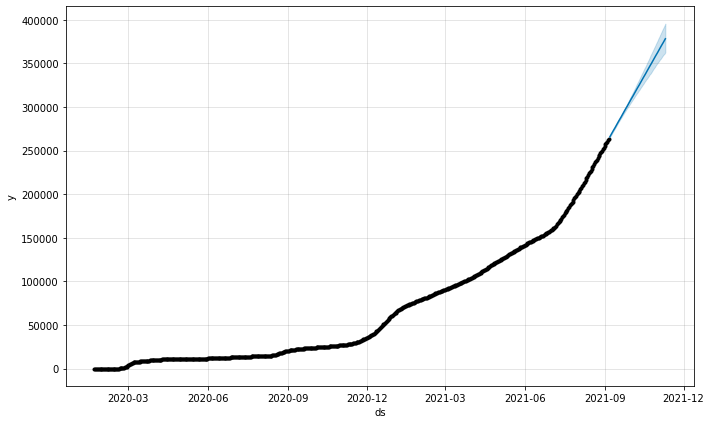

In [84]:
pred = model.predict(test_df)
model.plot(pred);

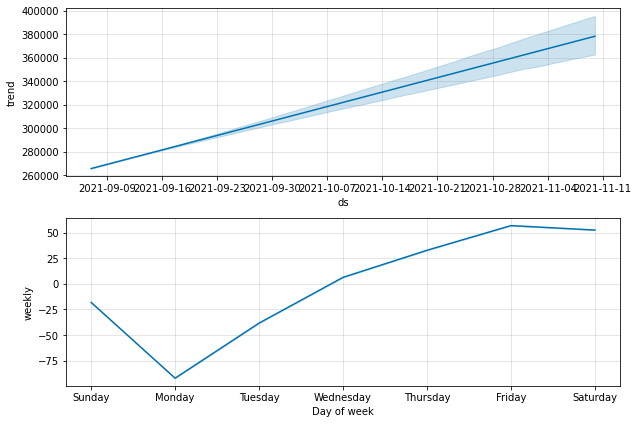

In [85]:
# model.plot() 메소드, model.plot_components() 메소드, add_changepoints_to_plot() 메소드 활용
model.plot_components(pred);

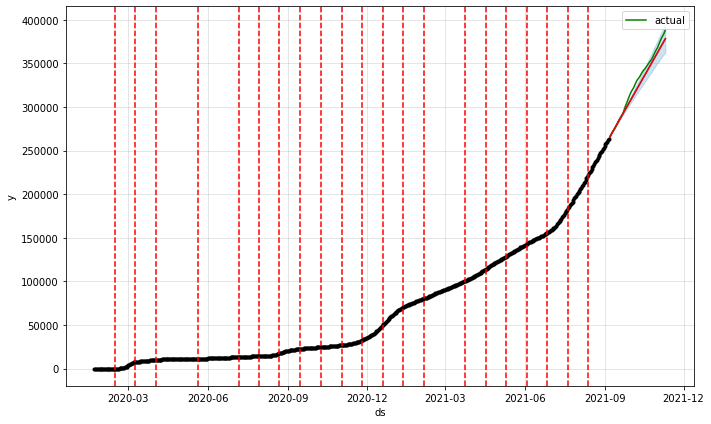

In [86]:
fig = model.plot(pred)
plt.plot(test_df['ds'], test_df['y'], 'g-', label='actual')
add_changepoints_to_plot(fig.gca(), model, pred)
plt.legend()

### 문제 14. 모델 학습 결과 평가하기

In [87]:
from sklearn.metrics import r2_score

In [90]:
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-09-07,265774.878184,265057.376934,266417.099257,265774.878184,265774.878184,-38.384248,-38.384248,-38.384248,-38.384248,-38.384248,-38.384248,0.0,0.0,0.0,265736.493936
1,2021-09-08,267532.216494,266846.941517,268239.243013,267532.216494,267532.216494,6.358511,6.358511,6.358511,6.358511,6.358511,6.358511,0.0,0.0,0.0,267538.575006
2,2021-09-09,269289.554805,268648.422630,269974.466510,269289.554805,269289.554805,32.839206,32.839206,32.839206,32.839206,32.839206,32.839206,0.0,0.0,0.0,269322.394011
3,2021-09-10,271046.893116,270416.705032,271868.536804,271046.893116,271046.893116,56.977724,56.977724,56.977724,56.977724,56.977724,56.977724,0.0,0.0,0.0,271103.870840
4,2021-09-11,272804.231426,272145.649041,273566.956957,272804.205575,272804.231426,52.612654,52.612654,52.612654,52.612654,52.612654,52.612654,0.0,0.0,0.0,272856.844080


In [89]:
# test_df와 pred를 비교하여 r2_score 평가
print('R2 Score: ', r2_score(test_df['y'], pred['yhat']))

R2 Score:  0.9685322124456294


### 문제 15. Prophet 모델로 미래 30일 데이터 예측하기

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


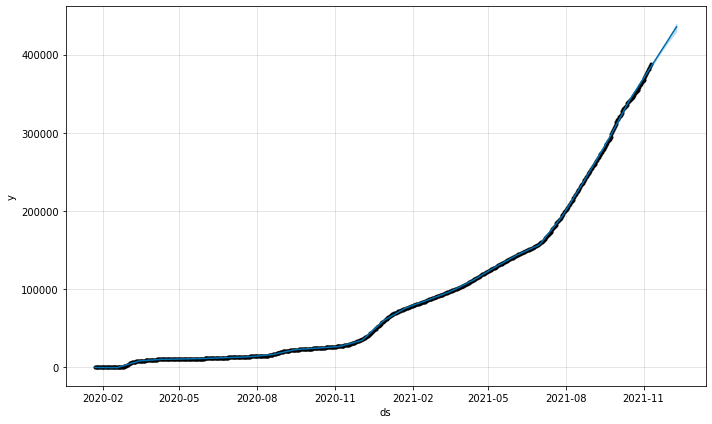

In [91]:
# 전체 df를 학습한 후, 향후 30일에 대한 데이터 예측하기
# Hint) make_future_dataframe() 메소드 활용
model = Prophet(changepoint_range=1.0)
model.fit(df)
future = model.make_future_dataframe(30)
pred = model.predict(future)
model.plot(pred);

## Step 6. IF-CASE 예측해보기


### 문제 16. 한국 확진자 수 변화의 특별한 이벤트 확인하기


In [ ]:
# 코로나 확산 초기, 한국의 확진자 수가 급증한 시점 찾기






### 문제 17. 이벤트가 없었을 경우 한국의 확진자 수 변화 예측하기


In [ ]:
# 확진자 수가 급증하기 전 데이터를 학습 후, 해당 시점으로부터 30일 간의 데이터 예측하여 실제 값과 비교하기




